# Medical Student Mental Health

L'objectiu d'aquest conjunt de dades és conèixer el benestar dels estudiants de medicina per tal de promoure millors polítiques mitjançant la comprensió de les relacions entre aquestes variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans

In [2]:
# Carreguem les dades i es desen en un marc de dades pandas
df = pd.read_csv("datasets/Data Carrard.csv")

age (int) edat del pacient

year (int) any del estudi

sex (str) genere del pacient

glang (str) llengua del pacient

job (str) feina del pacient

stud_h (int) hores d'estudi per setmana 

health (str) l'estat de salut - dit pel pacient

psyt (int) puntuació malestar psicologic 

jspe (int) satisfacció de la feina 

qcae_cog (int) puntuació empatica cognitiva 

qcae-aff (int) puntuació empatica afectiva 

amsp (int) puntuació motivació d'estudis

erec_mean (int) puntuació empatica mitjana

cesd (int) escala de depressió

stai_t (int) escala d'ansietat

mbi_ex (int) escala d'esgotament

mbi_cy (int) escala de cinisme

mbi_ea (int) escala d'eficiencia

In [3]:
# Comproveu les 10 primeres files de les dades
df.head(10)

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23
5,14,26,5,2,1,1,1,10,2,0,102,48,37,17,0.690476,14,56,18,15,18
6,17,23,5,2,1,1,0,15,3,0,117,58,38,23,0.714286,45,56,28,17,16
7,21,23,4,1,1,1,1,8,4,0,118,65,40,32,0.880952,6,36,11,10,27
8,23,23,4,2,1,1,1,20,2,0,118,69,46,23,0.666667,43,43,26,21,22
9,24,22,2,2,1,1,0,20,5,0,108,56,36,22,0.690476,11,43,18,6,23


### Neteja i preprocessament de dades

In [4]:
# Quantes columnes tenim?
print(df.columns)
print(df.shape)

Index(['id', 'age', 'year', 'sex', 'glang', 'part', 'job', 'stud_h', 'health',
       'psyt', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd',
       'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea'],
      dtype='object')
(886, 20)


In [5]:
# es borra la columna "id" ja que no és rellevant per a la pregunta de recerca.
df = df.drop('id', axis=1)

In [6]:
# comprovar els valors que falten i eliminar-los si és necessari (NaN)
df.isnull().sum()

age          0
year         0
sex          0
glang        0
part         0
job          0
stud_h       0
health       0
psyt         0
jspe         0
qcae_cog     0
qcae_aff     0
amsp         0
erec_mean    0
cesd         0
stai_t       0
mbi_ex       0
mbi_cy       0
mbi_ea       0
dtype: int64

In [7]:
# comprovar si hi ha duplicats i eliminar-los si és necessari.
df.duplicated().sum()

0

Fins ara hem comprovat que no hi hagi Nan's ni duplicats, com no n'hi ha de moment, no fa falta processar les dades del dataset en que treballem.

Separem les dades en dos grups: categòriques i numèriques. Passem a utilitzar diferents mètods per descriure i visualitzar les dades de cada grup.

In [8]:
# Separar les dades en dos grups: categòriques i numèriques
df_cat = df[['sex', 'year', 'glang', 'part', 'stud_h', 'job',  'health', 'psyt']]
df_num = df[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]

### Dades Categòriques
#### Descripció i visualització de les dades.

In [9]:
df_cat.head(10)

,sex,year,glang,part,stud_h,job,health,psyt
0,1,1,120,1,56,0,3,0
1,1,4,1,1,20,0,4,0
2,2,3,1,0,36,0,3,0
3,2,2,1,0,51,1,5,0
4,1,3,1,1,22,0,4,0
5,2,5,1,1,10,1,2,0
6,2,5,1,1,15,0,3,0
7,1,4,1,1,8,1,4,0
8,2,4,1,1,20,1,2,0
9,2,2,1,1,20,0,5,0


In [10]:
# Descripció.
df_cat.describe(include='all')

,sex,year,glang,part,stud_h,job,health,psyt
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,1.695260,3.102709,14.327314,0.563205,25.288939,0.348758,3.777652,0.224605
std,0.472665,1.763937,32.366389,0.496269,15.927875,0.476847,1.061497,0.417558
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,12.000000,0.000000,3.000000,0.000000
50%,2.000000,3.000000,1.000000,1.000000,25.000000,0.000000,4.000000,0.000000
75%,2.000000,5.000000,1.000000,1.000000,36.000000,1.000000,5.000000,0.000000
max,3.000000,6.000000,121.000000,1.000000,70.000000,1.000000,5.000000,1.000000


Veiem que aquesta ordre ens proporciona estadístiques descriptives per a totes les columnes del DataFrame, inclosos el recompte, la mitjana, la desviació estàndard, el mínim, el percentil 25, el percentil 50 (mediana), el percentil 75 i el màxim.



Seguidament, es calcula el recompte i el percentatge de cada categoria per a cada característica del DataFrame mitjançant la funció de tabulació creuada de la biblioteca pandas.

In [11]:
# Recompte i percentatge de cada categoria per a cada característica
for col in df_cat.columns:
    print(col) 
    print(pd.crosstab(index=df_cat[col], columns='count')) # imprimir el recompte de cada categoria
    print(pd.crosstab(index=df_cat[col], columns='percentage', normalize=True)) # imprimir el percentatge de cada categoria
    print('-----------------')

sex
col_0  count
sex         
1        275
2        606
3          5
col_0  percentage
sex              
1        0.310384
2        0.683973
3        0.005643
-----------------
year
col_0  count
year        
1        245
2        135
3        143
4        123
5        127
6        113
col_0  percentage
year             
1        0.276524
2        0.152370
3        0.161400
4        0.138826
5        0.143341
6        0.127540
-----------------
glang
col_0  count
glang       
1        717
15        31
20        22
37         3
54         1
60         3
63         5
90        45
92         1
95         1
98         1
102       27
104        4
106        6
108        1
114        1
118        2
120        2
121       13
col_0  percentage
glang            
1        0.809255
15       0.034989
20       0.024831
37       0.003386
54       0.001129
60       0.003386
63       0.005643
90       0.050790
92       0.001129
95       0.001129
98       0.001129
102      0.030474
104      0.004515
106

Per exemple, en el primer cas de la dada 'sex' ens diu que hi ha 275 homes, 606 dones i 5 persones no binaries i el percentatge que correpon a cada quantitat repecte el numero de persones total en que se'ls hi ha fet la enquesta. I això es fa per totes les dades categòriques. 

Deixem el que correpon al número de cada columna per cada categòria:

###### sex; GENERE : "1=Home; 2=Dona; 3=No binari";

###### year; ANY DEL CURRÍCULUM : "1=Bmed1; 2=Bmed2; 3=Bmed3; 4=Mmed1; 5=Mmed2; 6=Mmed3";

###### glang; LLENGUA MATERNA : "1=Francès; 15=Alemà; 20=Anglès; 37=Àrab; 51=Basc; 52=Búlgar; 53=Català; 54=Xinès; 59=Coreà; 60=Croat; 62=Dinamarquès; 63=Espanyol; 82=Estonià; 83=Finès; 84=Gallego; 85=Grec; 86=Hebreu; 87=Hindi;88=Hongarès; 89=Indonesi; 90=Italià; 92=Japonès; 93=Kazakh; 94=Letó; 95=Lituà; 96=Malaio; 98=Neerlandès; 100=Noruec; 101=Polonès; 102=Portuguès; 104=Romanès; 106=Rus; 108=Serbi; 112=Eslovac; 113=Eslovè; 114=Suec; 116=Ctxec; 117=Tailandiès; 118=Turc; 119=Ucraïnès; 120=Vietnamita; 121=Altres";

###### part; ESTAT DE PARELLA : "0=No; 1=Sí";

###### job; TENIR UN TREBALL : "0=No; 1=Sí";

###### health; SATISFACCIÓ AMB LA SALUT : "1=Molt insatisfet; 2=Insatisfet; 3=Ni satisfet ni insatisfet; 4=Satisfet; 5=Molt satisfet";

###### psyt; PSICOTERÀPIA L'ÚLTIM ANY :"0=No; 1=Sí";


A continuació, visualitzem al informació que hem extret anteriorment utilitzant Seaborn.

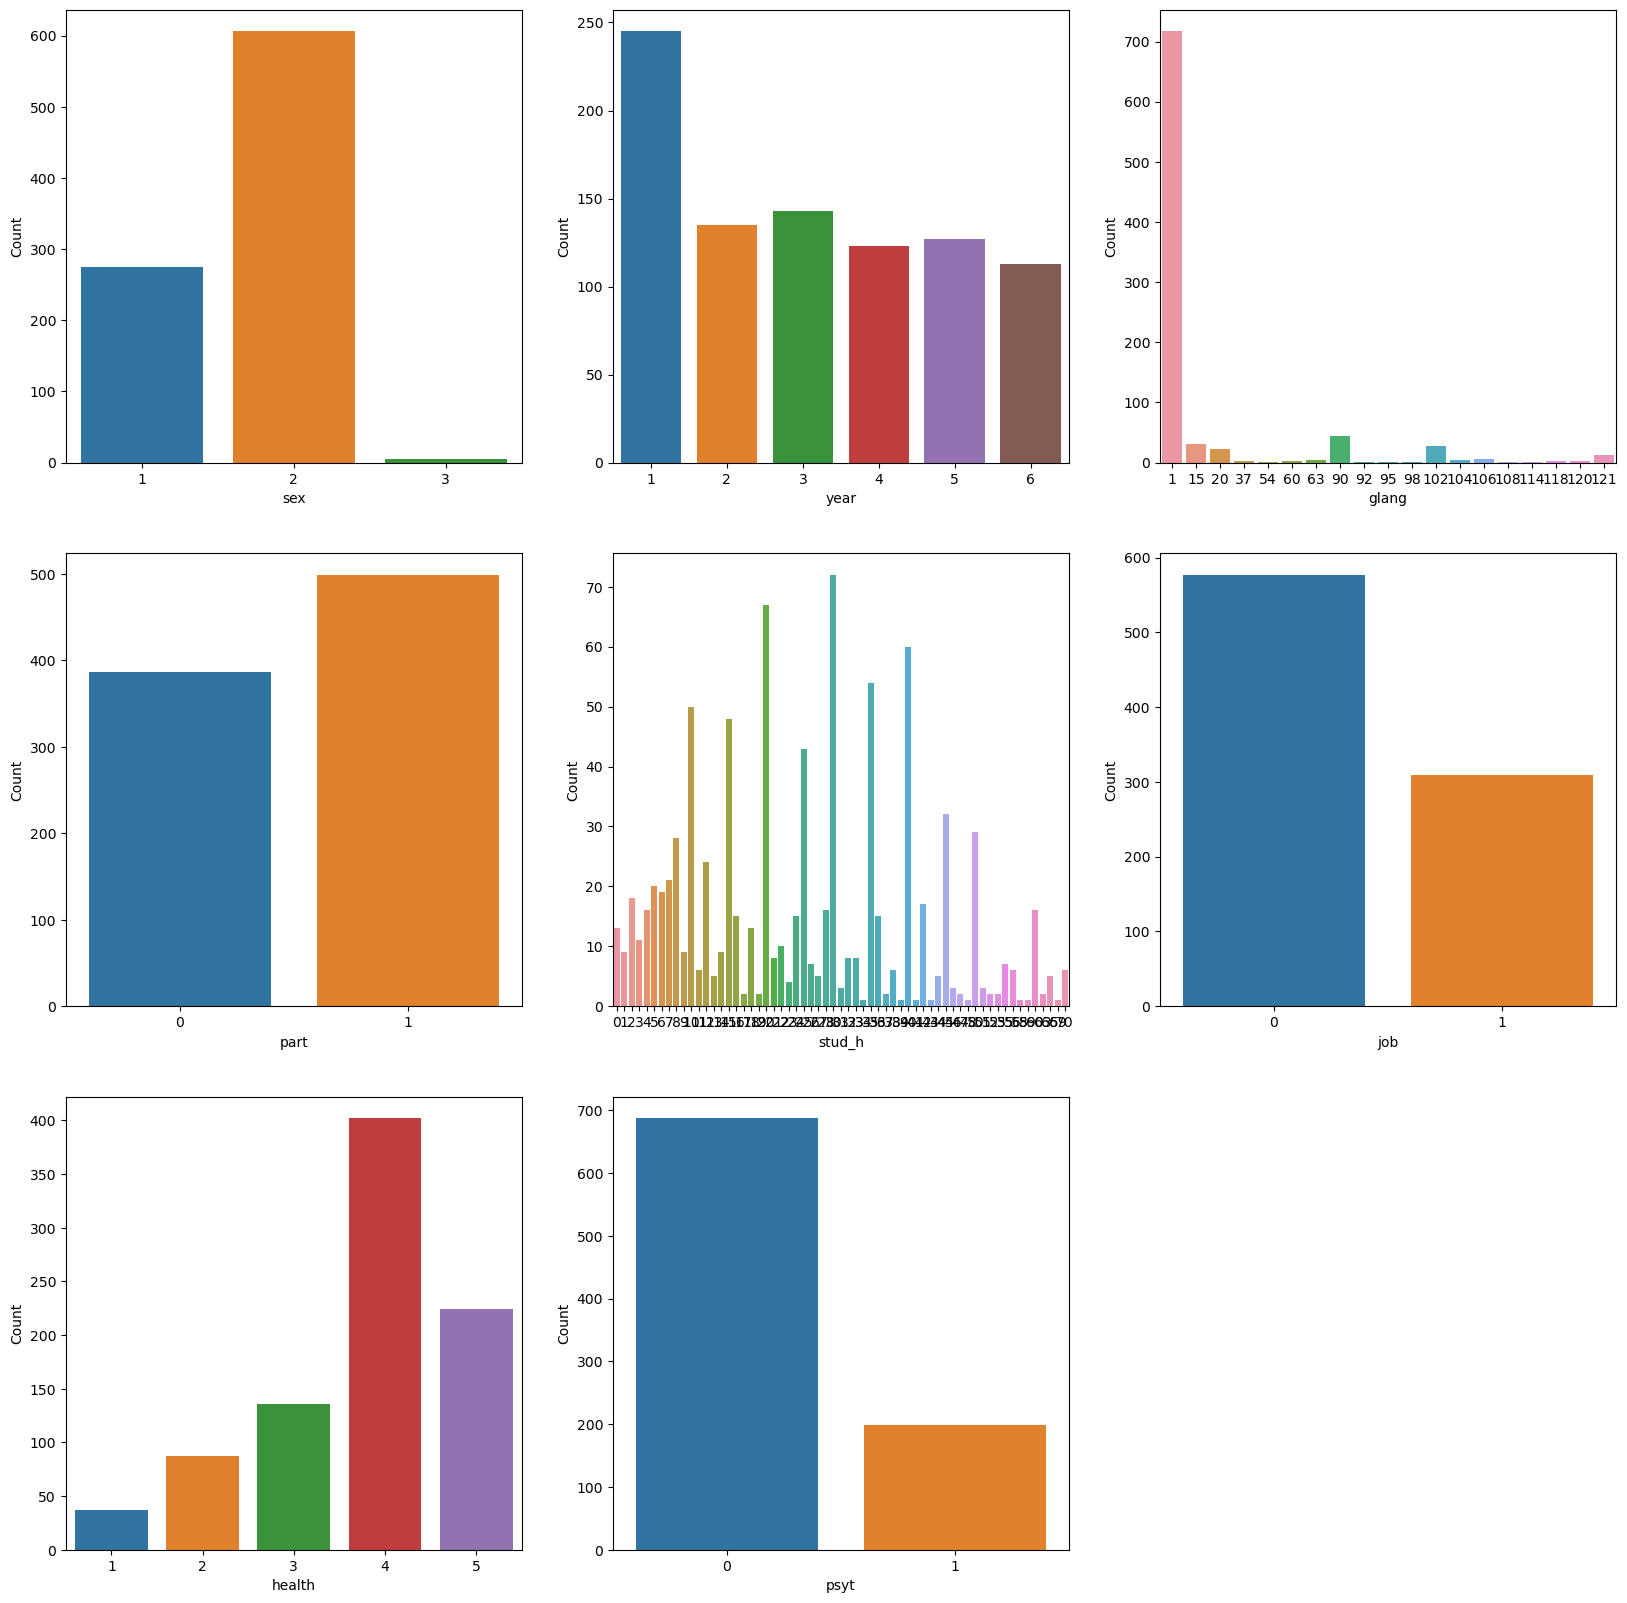

In [12]:
# Traçar el recompte de cada categoria per a cada funció mitjançant Seaborn

# Estableix la mida de la figura
plt.figure(figsize=(20, 20))

# Tra+ar el recompte de cada categoria per a cada característica
for i, col in enumerate(df_cat.columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, data=df_cat)
    plt.xlabel(col)
    plt.ylabel('Count')

A partir dels diagrames de barres podem veure que en l'enquesta sobresurten les diferents persones: de gènere dona, de llengua materna francesa, que estan curant el primer curs del grau, que tenen parella, que no tenen un treball, que se senten satisfets amb la seva salut i que en les últim any no han assistit a un psicòleg ni psiquiatra.

#### Trobar relacions entre variables categòriques mitjançant el test d'independència de Chi-quadrat.
Trobar relacions entre 2 variables categòriques: Test d'independència Chi-quadrat

1. Hipòtesi nul·la: no hi ha relació entre les dues variables
2. Hipòtesi alternativa: Hi ha una relació entre les dues variables
3. Si el valor p és inferior a 0,05, rebutgem la hipòtesi nul·la i concloem que hi ha una relació entre les dues variables

In [13]:
## Prova d'independència de Chi-quadrat per a cada parell de variables categòriques en un nou marc de dades
from scipy.stats import chi2_contingency

# Inicialització d'una taula per emmagatzemar els resultats de les proves de chi-quadrat
chi2_table = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Chi-Square', 'p-value'])
for i, col1 in enumerate(df_cat.columns):
    for j, col2 in enumerate(df_cat.columns):
        # Garantir que només s'executa la prova per a parells únics (sense repetició i diagonal principal)
        if i < j:
            # Calcular la taula de contingència i realitzar la prova de chi-quadrat
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_cat[col1], df_cat[col2]))
            chi2_table = chi2_table.append({'Variable 1': col1, 'Variable 2': col2, 'Chi-Square': chi2, 'p-value': p}, ignore_index=True)

C:\Users\jesus\AppData\Local\Temp\ipykernel_18156\147787907.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi2_table = chi2_table.append({'Variable 1': col1, 'Variable 2': col2, 'Chi-Square': chi2, 'p-value': p}, ignore_index=True)
C:\Users\jesus\AppData\Local\Temp\ipykernel_18156\147787907.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi2_table = chi2_table.append({'Variable 1': col1, 'Variable 2': col2, 'Chi-Square': chi2, 'p-value': p}, ignore_index=True)
C:\Users\jesus\AppData\Local\Temp\ipykernel_18156\147787907.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi2_table = chi2_table.append({'Variable 1': col1, 'Variable 2': col2, 'Chi-Square': chi2, 'p-value': p}, ignore_index=True)
C:\Users\jesus\A

Així, la taula chi2_table contindrà els resultats de les proves de chi-quadrat (proporciona una mesura de quanta diferència hi ha entre les freqüències observades i les freqüències esperades) per a cada parell de variables categòriques, incloent l'estadístic Chi-Square i el valor p. Aquests resultats ens poden ajudar a avaluar la independència entre les diferents variables. Si el valor p és baix (inferior a 0.05), podem rebutjar la hipòtesi nul·la d'independència (no hi ha relació) entre les dues variables.

In [14]:
# Conservem només els parells de variables que estan relacionades (valor p < 0,05) i els ordenem per valor p en ordre ascendent (com més petit sigui el valor p, més forta serà la relació).
chi2_table = chi2_table[chi2_table['p-value'] < 0.05].sort_values(by='p-value')
chi2_table

,Variable 1,Variable 2,Chi-Square,p-value
9,year,stud_h,608.992141,3.320205e-23
10,year,job,72.560233,3.002212e-14
6,sex,psyt,23.484975,7.948815e-06
27,health,psyt,27.583952,1.514423e-05
8,year,part,27.375938,4.818767e-05
5,sex,health,21.975553,4.961357e-03
23,stud_h,health,293.764489,1.013227e-02
1,sex,glang,54.444023,2.496473e-02
22,stud_h,job,81.825491,3.207564e-02
2,sex,part,6.787509,3.358236e-02


Les variables amb p-valors baixos (generalment inferiors a 0,05) indiquen que hi ha una relació significativa entre dues variables, mentre que aquelles amb p-valors alts suggereixen que la relació no és significativa.

En el nostre cas, les variables amb p-valors baixos són:

job / part i any (p-valor inferior a 0,001)
psyt i sex/salut (p-valor inferior a 0,001)
salut i sex (p-valor = 0,004961)
glang i sex (p-valor = 0,024965)
part i sex (p-valor = 0,033582)
Podem concloure que, pel que fa a les variables relacionades amb la salut i el benestar:

El sexe i la salut estan relacionats amb una psicoteràpia en l'últim any.
El sexe i la salut estan relacionats.
#### Taules de 'Cross-Tabulation' i 'Stacked Bar Plots'

El codi següent, imprimeix els percentatges de cada categoria per a cada parell de variables en una taula de contingència (crosstab) normalitzada utilitzant la funció pd.crosstab de la biblioteca Pandas. La normalització es realitza mitjançant l'ús de l'argument normalize=True.

In [15]:
# Percentatge de cada categoria per a cada parell de variables a chi2_table
for i, row in chi2_table.iterrows():
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    print(var1 + " and " + var2)
    print(pd.crosstab(index=df[var1], columns=df[var2], normalize=True))
    print('-----------------')

year and stud_h
stud_h        0         1         2         3         4         5         6   \
year                                                                           
1       0.001129  0.000000  0.000000  0.000000  0.001129  0.001129  0.006772   
2       0.000000  0.000000  0.000000  0.000000  0.001129  0.000000  0.001129   
3       0.002257  0.000000  0.002257  0.001129  0.000000  0.004515  0.001129   
4       0.001129  0.001129  0.001129  0.002257  0.004515  0.005643  0.003386   
5       0.002257  0.000000  0.003386  0.001129  0.001129  0.005643  0.001129   
6       0.007901  0.009029  0.013544  0.007901  0.010158  0.005643  0.007901   

stud_h        7         8         9   ...        53        55        56  \
year                                  ...                                 
1       0.009029  0.006772  0.004515  ...  0.001129  0.005643  0.005643   
2       0.002257  0.001129  0.000000  ...  0.001129  0.002257  0.001129   
3       0.003386  0.004515  0.000000  ...  

A continuació, es treballa amb la relació entre les variables "psyt" i "sex". Volem saber quin sexe (home, dona o no-binari) ha anat més al psicòleg l'últim any.

Primer, visualitzem la informació que tenim, que extreiem de la taula crosstab inicialitzada al codi anterior, per veure la relació. 

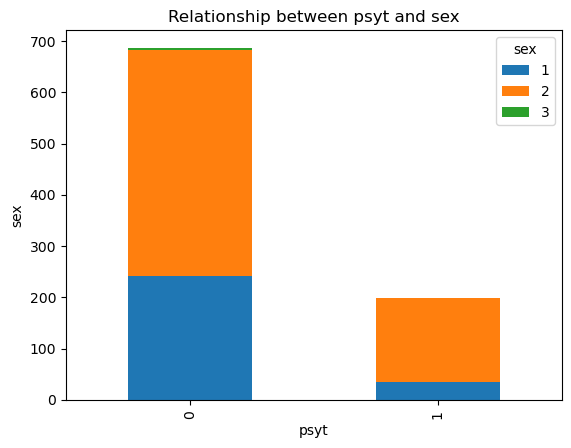

In [16]:
# Traçar relacions entre psyt i sexe
var1 = "psyt"
var2 = "sex"

# Crea una taula de tabulació creuada
ctab = pd.crosstab(df[var1], df[var2])

# Traçar la taula de tabulació creuada
ctab.plot(kind='bar', stacked=True)
plt.title("Relationship between " + var1 + " and " + var2)
plt.xlabel(var1)
plt.ylabel(var2)
plt.show()

A partir d'aquest gràfic podem saber que majoritàriament les persones (més de 650) no han hanat al psicòleg però, unes 200 persones si que hi han anat i d'aquestes veiem que destaquen molt més les dones. Com que sabem que hi ha més dones que homes enquestats també és lògic que el resultat sigui aquest.

Ara, vegem quin sexe va visitar més un psicoterapeuta durant l'últim any amb dades numèriques per obtenir uns numeros més precisos.

In [17]:
# Cració del nou marc de dades
df_psyt = pd.DataFrame(data={'psyt': df_cat['psyt'], 'sex': df_cat['sex']})

# Agrupa les dades per psicoteràpia i sexe
df_psyt = df_psyt.groupby(['psyt', 'sex']).size().reset_index(name='count')

# Calcula el percentatge d'homes, dones i no binaris a cada categoria de salut
total = df_psyt['count'].sum()
df_psyt['percentage'] = df_psyt['count'] / total * 100
df_psyt['sex'] = df_psyt['sex'].map({1: 'Male', 2: 'Female', 3: 'Non Binary'})

In [18]:
df_psyt

,psyt,sex,count,percentage
0,0,Male,241,27.200903
1,0,Female,442,49.887133
2,0,Non Binary,4,0.451467
3,1,Male,34,3.837472
4,1,Female,164,18.510158
5,1,Non Binary,1,0.112867


A partir de les dades anteriors podem arribar a algunes conclusions:

  1-El 49.89% de les dones (Female) no han participat en psicoteràpia (psyt=0), mentre que el 27.20% dels homes (Male) tampoc ho han fet.
  
  2-El 0.45% dels participants de gènere "No Binari" (Non Binary) han anat al psicòleg (psyt=0) i nomès el 0,11% sí que hi han anat (psyt=1).

  3-Hi ha més dones (Female) en la mostra global (49.89%) en comparació amb els homes (Male, 27.20%).

  4-Les dones tenen una taxa més alta de participació en psicoteràpia (18.51%) en comparació amb els homes (3.83%).

  5-En general, el 22.46% de la mostra ha participat en psicoteràpia.

En el codi següent, imprimim el percentatge de cada parell de variables a chi2_table

In [19]:
#Fer-ho per a cada parell de variables de chi2_table
for i, row in chi2_table.iterrows():
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    print(var1 + " and " + var2)
    df_temp = pd.DataFrame(data={var1: df_cat[var1], var2: df_cat[var2]})
    df_temp = df_temp.groupby([var1, var2]).size().reset_index(name='count')
    total = df_temp['count'].sum()
    df_temp['percentage'] = df_temp['count'] / total * 100
    df_temp.append(df_temp.sum(numeric_only=True), ignore_index=True)
    print(df_temp)
    print('-----------------')

year and stud_h
     year  stud_h  count  percentage
0       1       0      1    0.112867
1       1       4      1    0.112867
2       1       5      1    0.112867
3       1       6      6    0.677201
4       1       7      8    0.902935
..    ...     ...    ...         ...
217     6      35      1    0.112867
218     6      36      2    0.225734
219     6      40      3    0.338600
220     6      45      1    0.112867
221     6      50      1    0.112867

[222 rows x 4 columns]
-----------------
year and job
    year  job  count  percentage
0      1    0    198   22.347630
1      1    1     47    5.304740
2      2    0    105   11.851016
3      2    1     30    3.386005
4      3    0     82    9.255079
5      3    1     61    6.884876
6      4    0     57    6.433409
7      4    1     66    7.449210
8      5    0     63    7.110609
9      5    1     64    7.223476
10     6    0     72    8.126411
11     6    1     41    4.627540
-----------------
sex and psyt
   sex  psyt  count  perc

C:\Users\jesus\AppData\Local\Temp\ipykernel_18156\2370111401.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_temp.append(df_temp.sum(numeric_only=True), ignore_index=True)
C:\Users\jesus\AppData\Local\Temp\ipykernel_18156\2370111401.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_temp.append(df_temp.sum(numeric_only=True), ignore_index=True)
C:\Users\jesus\AppData\Local\Temp\ipykernel_18156\2370111401.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_temp.append(df_temp.sum(numeric_only=True), ignore_index=True)
C:\Users\jesus\AppData\Local\Temp\ipykernel_18156\2370111401.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

Fins ara, hem analitzat la relació entre les variables categòriques però a ara passem a analitzar les variables numèriques.

### Dades contínues - Variables numèriques
#### Estadístiques descriptives

In [20]:
df_num.head(10)

,age,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,18,88,62,27,17,0.738095,34,61,17,13,20
1,26,109,55,37,22,0.690476,7,33,14,11,26
2,21,106,64,39,17,0.690476,25,73,24,7,23
3,21,101,52,33,18,0.833333,17,48,16,10,21
4,21,102,58,28,21,0.690476,14,46,22,14,23
5,26,102,48,37,17,0.690476,14,56,18,15,18
6,23,117,58,38,23,0.714286,45,56,28,17,16
7,23,118,65,40,32,0.880952,6,36,11,10,27
8,23,118,69,46,23,0.666667,43,43,26,21,22
9,22,108,56,36,22,0.690476,11,43,18,6,23


### Distribució de variables numèriques
A continuació, s'utilitza Matplotlib i Seaborn per crear un conjunt de gràfics de distribució per a les columnes numèriques del DataFrame 'df_num' amb histogrames i corbes de densitat per a cada variable. Aquest tipus de visualització és útil per entendre la distribució de les dades i identificar patrons o tendències en les variables numèriques.

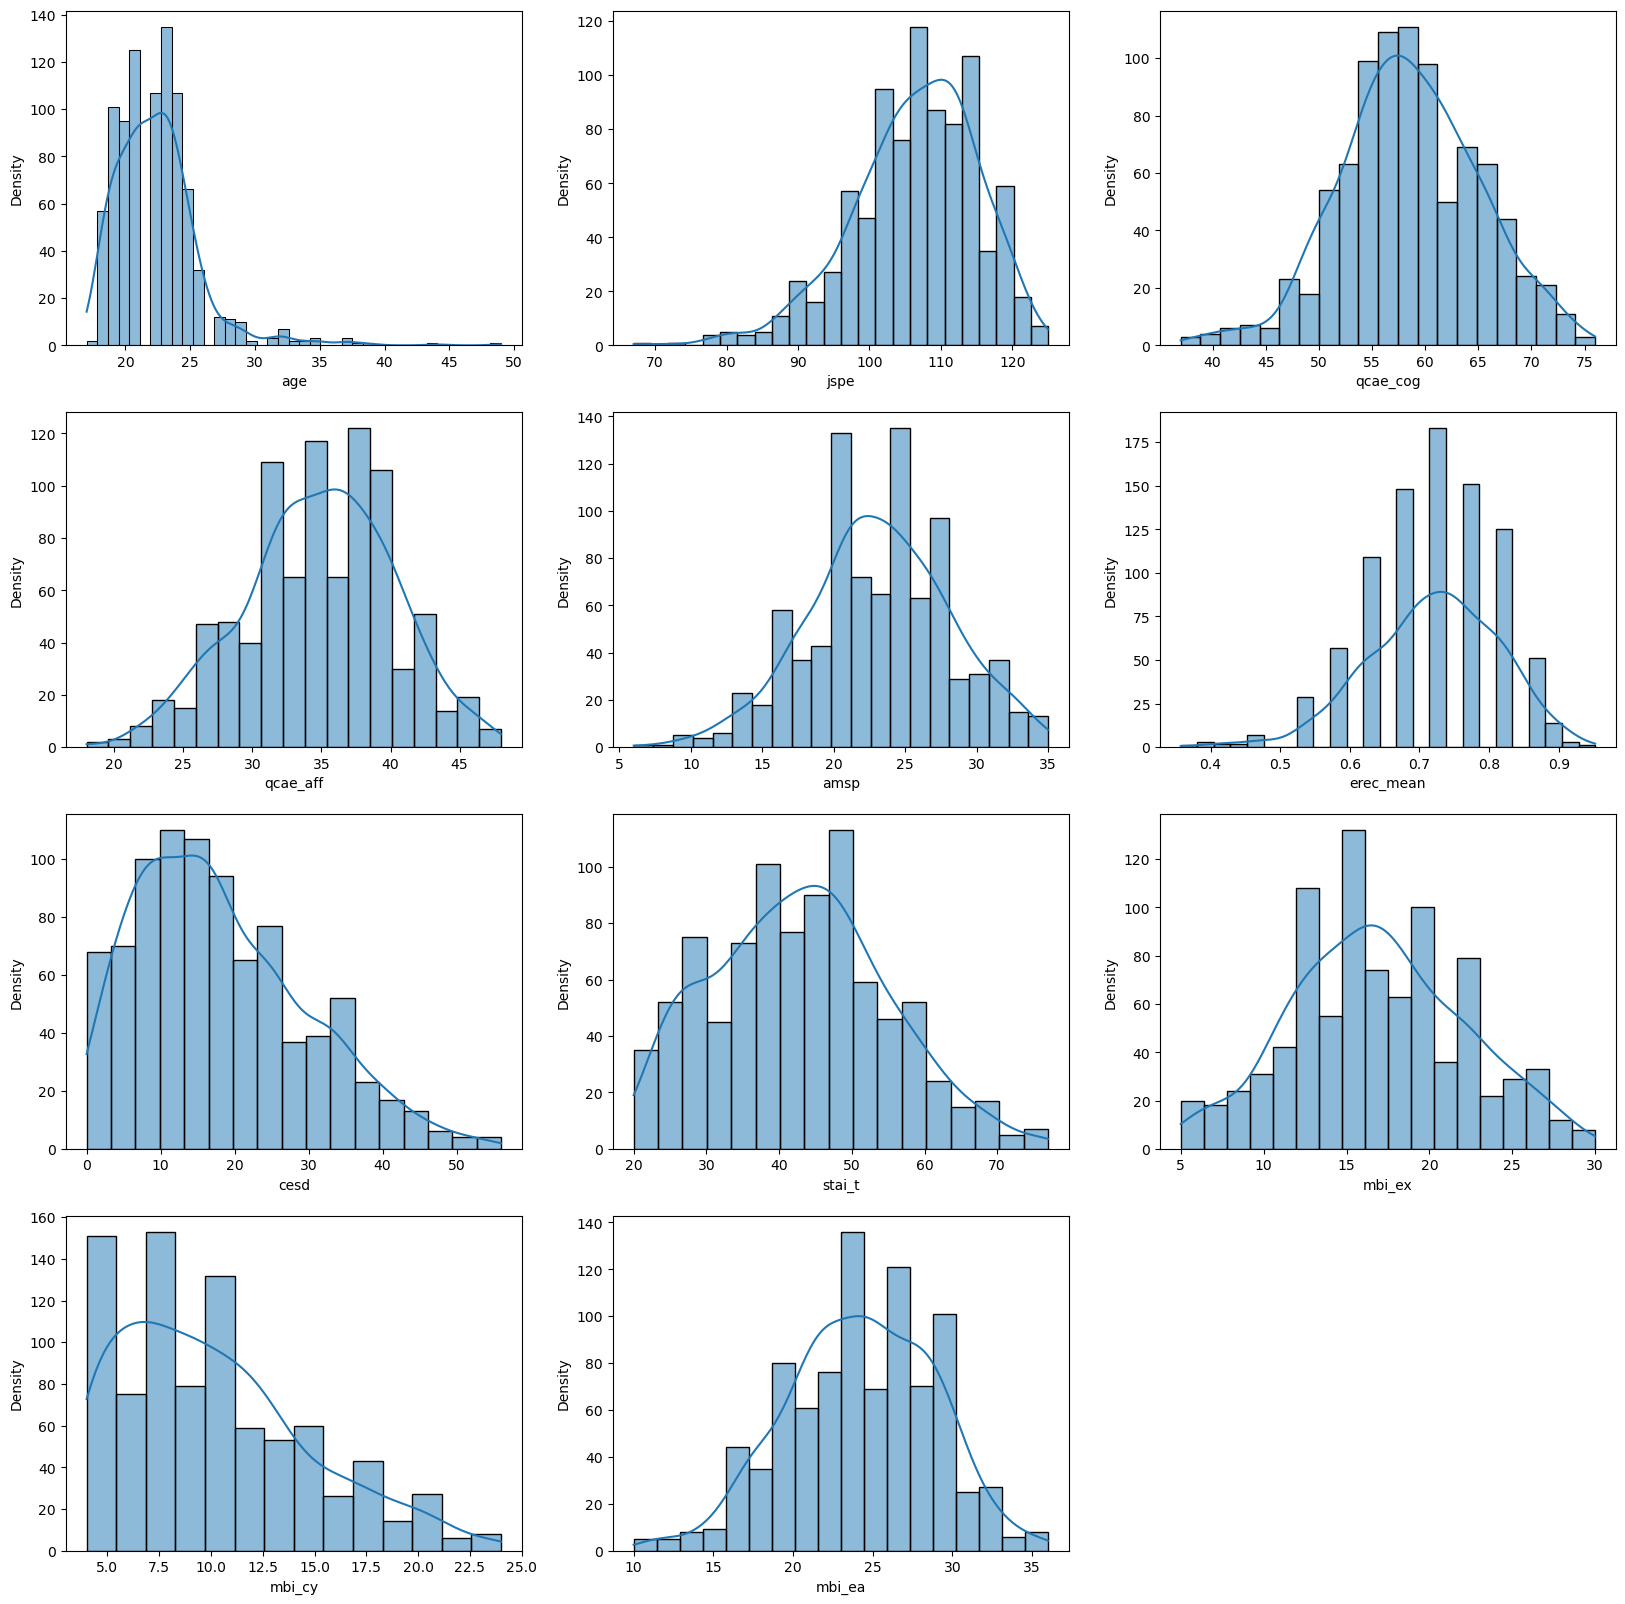

In [21]:
# Representació de la distribució de cada variable numèrica mitjançant Seaborn
# Estableix la mida de la figura
plt.figure(figsize=(20, 20))

for i, col in enumerate(df_num.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(df_num[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Density')

plt.show()

#### Matriu de correlació i mapa de calor

El següent codi crea una matriu de correlació utilitzant el coeficient de correlació de Pearson (r) i el valor p (p) per determinar la significació estadística entre les variables numèriques del DataFrame df_num. 

La correlació de Pearson és una mesura estadística que avalua la relació lineal entre dues variables contínues. Aquest coeficient de correlació va de -1 a 1, amb els següents significats:

1: Correlació positiva: Les dues variables augmenten conjuntament en una relació lineal perfecta.

0: No hi ha correlació: Les dues variables no estan relacionades linealment.

-1: Correlació negativa perfecta: Una variable augmenta i l'altra disminueix. Relació inversa o inversament proporcional entre les dues variables.

In [22]:
# Matriu de correlació utilitzant el coeficient de correlació de Pearson (r) i el valor p (p) per determinar la significació estadística
corr_matrix = df_num.corr(method='pearson')
corr_matrix

,age,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
age,1.000000,0.223221,0.059355,-0.008130,0.000477,-0.018699,-0.139106,-0.081893,-0.182733,-0.001853,0.046130
jspe,0.223221,1.000000,0.342668,0.263384,0.099395,0.097062,-0.080058,-0.075036,-0.040542,-0.006981,0.082508
qcae_cog,0.059355,0.342668,1.000000,0.258696,0.386682,0.073708,-0.034244,-0.077868,-0.023630,-0.024820,0.184096
qcae_aff,-0.008130,0.263384,0.258696,1.000000,-0.071391,0.141379,0.250947,0.331350,0.215886,0.128488,-0.113891
amsp,0.000477,0.099395,0.386682,-0.071391,1.000000,0.002780,-0.152052,-0.249231,-0.073011,-0.029343,0.220616
erec_mean,-0.018699,0.097062,0.073708,0.141379,0.002780,1.000000,0.029881,0.037688,0.015348,0.061965,-0.034889
cesd,-0.139106,-0.080058,-0.034244,0.250947,-0.152052,0.029881,1.000000,0.715728,0.605617,0.407727,-0.453589
stai_t,-0.081893,-0.075036,-0.077868,0.331350,-0.249231,0.037688,0.715728,1.000000,0.530486,0.331884,-0.462535
mbi_ex,-0.182733,-0.040542,-0.023630,0.215886,-0.073011,0.015348,0.605617,0.530486,1.000000,0.505200,-0.480821
mbi_cy,-0.001853,-0.006981,-0.024820,0.128488,-0.029343,0.061965,0.407727,0.331884,0.505200,1.000000,-0.565939


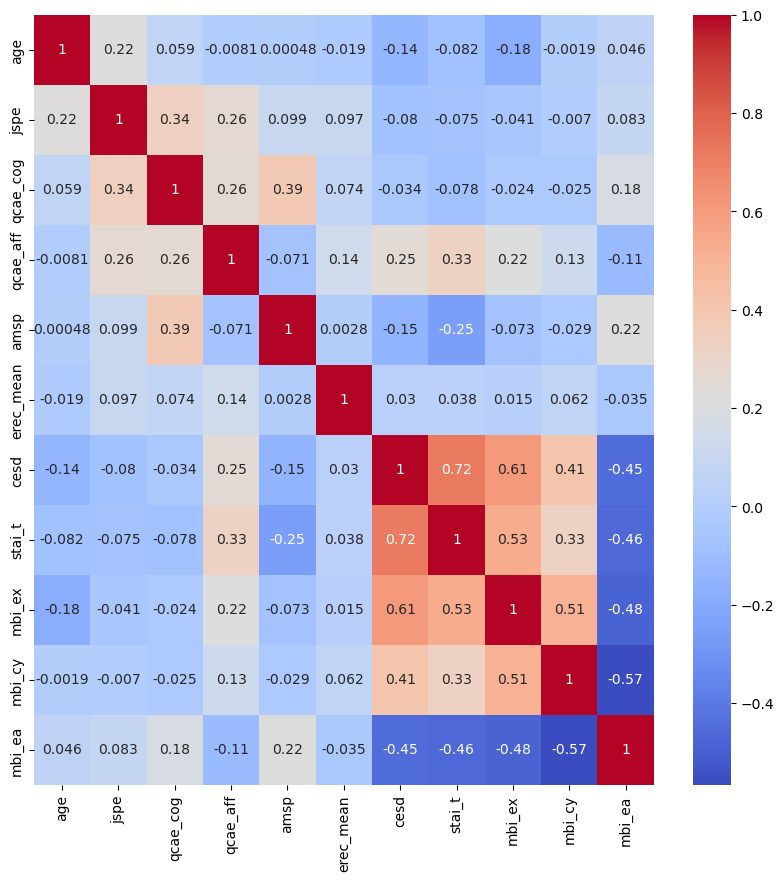

In [23]:
# Mapa de calor de la matriu de correlació
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

En general, veiem que les variables no tenen massa correlació entre elles (valors pròxim a 0), ara bé veiem que les varibles 'cesd', 'stai_t' , 'mbi_ex' i 'mbi_cy' entre elles tenen un grau de correlació major.

Aquestes correlacions més fortes entre variables les veiem seguidament ja que obtenim un marc de dades de les variables de més a menys correlacionades, obtenint els valors del positiu més gran (relació proporcional) al negatiu més petit (relació inversa) passant pels valors més pròxims a 0 (no correlació).

In [24]:
# Obteniu un marc de dades de les variables més o menys correlacionades
corr_matrix = corr_matrix.unstack().reset_index()
corr_matrix.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr_matrix = corr_matrix[corr_matrix['Variable 1'] != corr_matrix['Variable 2']]
corr_matrix = corr_matrix.sort_values(by='Correlation', ascending=False)
corr_matrix

,Variable 1,Variable 2,Correlation
73,cesd,stai_t,0.715728
83,stai_t,cesd,0.715728
74,cesd,mbi_ex,0.605617
94,mbi_ex,cesd,0.605617
85,stai_t,mbi_ex,0.530486
...,...,...,...
117,mbi_ea,stai_t,-0.462535
118,mbi_ea,mbi_ex,-0.480821
98,mbi_ex,mbi_ea,-0.480821
109,mbi_cy,mbi_ea,-0.565939


Veiem que la correlació major és entre les variables stai_i i cesd amb un 0.716.

· La CES-D és una escala utilitzada per mesurar la depressió en la població general.

· STAI és una mesura utilitzada per avaluar els nivells d'ansietat en funció de dos factors: estat d'ansietat (State) i trai d'ansietat (Trait).

#### Anàlisi de components principals (PCA)
La PCA és una tècnica de reducció de la dimensionalitat que s'utilitza per reduir el nombre de variables en un conjunt de dades alhora que reté la màxima informació possible. S'utilitza per reduir el nombre de variables d'un conjunt de dades transformant un conjunt gran de variables en un de més petit que encara conté la major part de la informació del conjunt gran.

In [25]:
# Imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
# Estandarditzar les dades
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)

# Creeu una instància PCA: pca
pca = PCA(n_components=0.95)

# Ajusteu la instància PCA a les mostres escalades
pca.fit(df_num_scaled)

# Transformeu les mostres escalades: pca_features
pca_features = pca.transform(df_num_scaled)

# Imprimeix la forma de pca_features
print("The shape of the pca is : ", pca_features.shape)

The shape of the pca is :  (886, 10)


Es crea una instància de l'objecte PCA (pca). L'argument n_components=0.95 indica que volem conservar el 95% de la variància total de les dades originals. Això determina automàticament el nombre de components principals necessaris per assolir aquest objectiu.

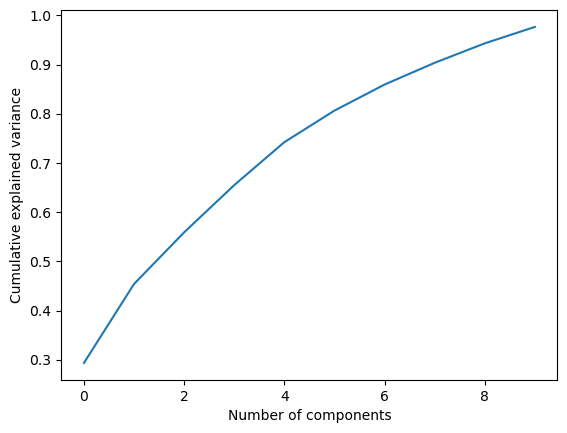

In [27]:
# Traceu la suma acumulada de la relació de variància explicada
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

Interpretació:

1. La variància explicada: Us indica quant d'informació (variància) es pot atribuir a cada un dels components principals. Això significa que cada component principal explica una part de la variància total en les dades originals.

2. La variància acumulada explicada: Us indica quant d'informació (variància) es pot atribuir als components principals acumulats fins a aquell punt. Aquest valor s'obté sumant la variància explicada de cada component principal fins a aquell punt específic.

##### Coeficients de càrrega dels components principals
Els coeficients de càrrega són els coeficients que descriuen com cada variable contribueix als components principals. Les càrregues són els pesos que s'assignen a cada variable en un component principal. Com més gran sigui el valor absolut de la càrrega, més important és la variable en aquest component principal. Les càrregues poden ser positives o negatives, depenent de la direcció de la correlació entre la variable i el component principal.

Per tant:

1. Si una càrrega és positiva, indica una correlació positiva entre la variable i el component principal.

2. Si una càrrega és negativa, indica una correlació negativa entre la variable i el component principal.

In [28]:
# Creació d'un marc de dades de les càrregues dels quatre primers components principals i dels noms de variables (columnes) del conjunt de dades original (índex)
loadings = pd.DataFrame({'Feature': df_num.columns, 'PC1': pca.components_[0], 'PC2': pca.components_[1], 'PC3': pca.components_[2], 'PC4': pca.components_[3]})
loadings

# Ordena les càrregues de cada component principal pel seu valor absolut en ordre descendent i imprimeix les primeres 5 files
loadings = loadings.sort_values(by=['PC1', 'PC2', 'PC3', 'PC4'], ascending=False)
loadings.head(20)

,Feature,PC1,PC2,PC3,PC4
6,cesd,0.458541,-0.046279,-0.085557,-0.076355
7,stai_t,0.449099,-0.033290,0.080979,-0.162486
8,mbi_ex,0.439070,-0.064837,-0.208321,0.077397
9,mbi_cy,0.370709,-0.072630,-0.078645,0.432332
3,qcae_aff,0.194772,-0.433048,0.202812,-0.379505
5,erec_mean,0.041116,-0.206945,0.142923,-0.408599
1,jspe,-0.061134,-0.524935,0.311785,0.100690
2,qcae_cog,-0.082262,-0.586499,-0.266619,0.016397
0,age,-0.099325,-0.166581,0.578004,0.545685
4,amsp,-0.164774,-0.320225,-0.605181,0.284402


Les variables originals més significatives per a cada component principal es poden identificar examinant la magnitud de les seves càrregues, és a dir, els pesos assignats a cada variable en la construcció de cada component principal.

1. Pel primer component principal (PC), les variables amb les càrregues absolutes més altes són "cesd", "stai_t" i "mbi_ex".

2. Pel segon component principal, la variable amb la càrrega absoluta més alta és "qcae_cog".

3. Pel tercer component principal, la variable amb la càrrega absoluta més alta és "amsp".

4. Pel quart component principal, la variable amb la càrrega absoluta més alta és "age".

Aquestes són les variables originals més significatives per a cada component principal, i són les que contribueixen més a explicar la variància en el conjunt de dades.

##### Agrupament (Clustering)
L'agrupament és el procés de reunir un conjunt d'objectes de tal manera que els objectes en el mateix grup (anomenat clúster) siguin més similars (d'alguna manera) entre ells que amb els que es troben en altres grups (clústers).

Això implica organitzar les dades en grups o clústers basant-se en la seva semblança, de manera que les observacions dins d'un mateix clúster siguin més semblants entre elles que amb les observacions d'altres clústers. L'objectiu és que les observacions dins del mateix clúster tinguin més similituds intragrups que intergrups.

In [29]:
# Imports
from sklearn.cluster import KMeans

Seguidament s'utilitza el mètode k-means per realitzar el clustering. Aquest, té com a objectiu particionar un conjunt de dades en K clústers (grups) on cada observació pertany al clúster amb la mitjana més propera.

In [30]:
# Creació d'una instància de KMeans amb 3 clústers: modeleu (k=3) i ajusteu-lo a les dades (pca_features) mitjançant el mètode fit()
model = KMeans(n_clusters=3)
clusters = model.fit_predict(pca_features)

c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jesus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


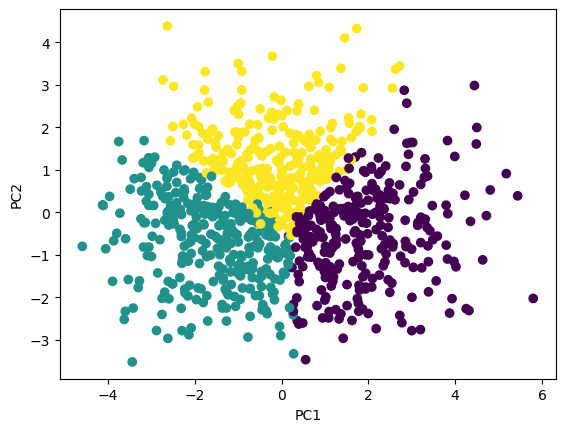

In [31]:
# Creació d'un diagrama de dispersió dels dos primers components principals
plt.scatter(pca_features[:,0], pca_features[:,1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [32]:
# Extracció de les etiquetes del clúster
cluster_labels = model.labels_

In [34]:
# Afegir les etiquetes del clúster al marc de dades original
df_clustered = df_num.copy() # Creeu una còpia del marc de dades original
df_clustered['Cluster'] = cluster_labels # Afegiu les etiquetes del clúster a la còpia del marc de dades original

In [35]:
df_clustered.head(5) 

,age,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea,Cluster
0,18,88,62,27,17,0.738095,34,61,17,13,20,2
1,26,109,55,37,22,0.690476,7,33,14,11,26,1
2,21,106,64,39,17,0.690476,25,73,24,7,23,0
3,21,101,52,33,18,0.833333,17,48,16,10,21,2
4,21,102,58,28,21,0.690476,14,46,22,14,23,2


In [36]:
# Agrupant el marc de dades per clúster per obtenir les propietats de cada clúster
cluster_grouped = df_clustered.groupby('Cluster')
cluster_properties = cluster_grouped.mean()

# Impressió de les propietats de cada clúster (valors mitjans de les variables)
print(cluster_properties)

               age        jspe   qcae_cog   qcae_aff       amsp  erec_mean  \
Cluster                                                                      
0        22.220641  108.060498  59.533808  37.444840  22.352313   0.737756   
1        23.385113  111.055016  61.864078  34.585761  25.495146   0.730775   
2        21.493243   99.888514  54.084459  32.466216  21.459459   0.692326   

              cesd     stai_t     mbi_ex     mbi_cy     mbi_ea  
Cluster                                                         
0        29.056940  53.099644  21.672598  13.629893  20.750890  
1        10.158576  34.404531  13.346278   7.682848  27.543689  
2        15.841216  42.081081  16.013514   9.209459  24.006757  


In [37]:
# Obtenció del nombre de pacients de cada clúster
cluster_grouped.size()

Cluster
0    281
1    309
2    296
dtype: int64

Hi ha 3 clusters, el cluster 0 amb 281 pacients, el Cluster 1 amb 309 pacients, i el Cluster 2 has 296 pacients.

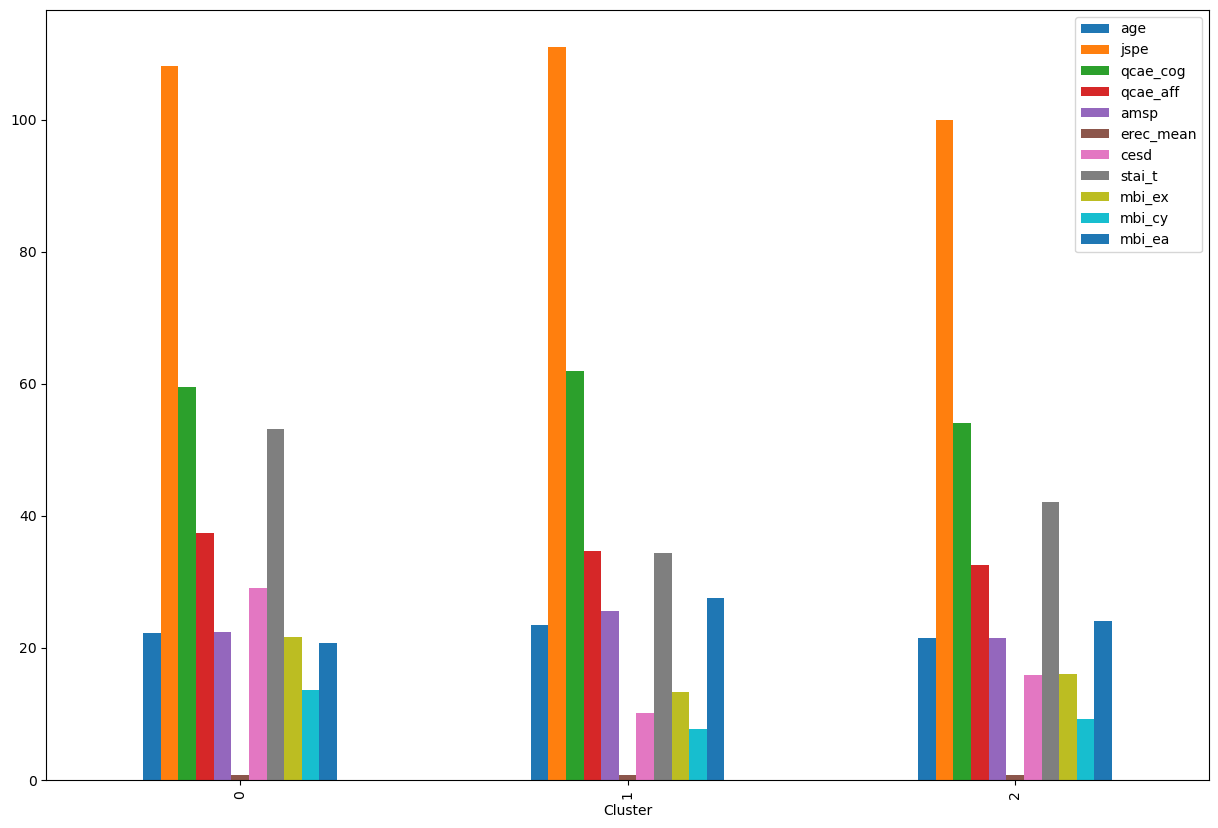

In [38]:
# Representació de les propietats de cada clúster
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

##### Interpretació dels clústers (proprietats de cada clúster)
El Clúster 1 és el clúster amb els valors més baixos de les variables. Els pacients en aquest clúster són aquells amb els nivells més baixos de depressió, ansietat i estrès.

El Clúster 0 és el clúster amb els valors més alts de les variables. Els pacients en aquest clúster són aquells amb els nivells més alts de depressió, ansietat i estrès.

El Clúster 2 és el clúster amb els valors intermedis de les variables. Els pacients en aquest clúster són aquells amb nivells intermedis de depressió, ansietat i estrès.
#### Machine Learning
Utilitzarem les etiquetes dels clústers com a variable objectiu i els components principals com a característiques per entrenar un model de regressió logística.

In [39]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [40]:
# Divideix les dades en conjunts d'entrenament i de prova
X_train, X_test, y_train, y_test = train_test_split(pca_features, cluster_labels, test_size=0.2, random_state=42) # 80% training and 20% test data sets

# Crear un classificador de regressió logística
logreg = LogisticRegression()

# Ajustar el classificador a les dades d'entrenament
logreg.fit(X_train, y_train)

# Predir les etiquetes del conjunt de proves: y_pred
y_pred = logreg.predict(X_test)

# Calculeu i imprimiu la precisió
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.9887640449438202


##### Model Evaluation

In [41]:
# Importa els moduls necessaris
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [42]:
# Calcula i imprimeix la matriu de confusió i l'informe de classificació
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[55  0  1]
 [ 0 62  0]
 [ 1  0 59]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       1.00      1.00      1.00        62
           2       0.98      0.98      0.98        60

    accuracy                           0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178



En la matriu de confusió, les files representen les etiquetes reals dels clústers, i les columnes representen les etiquetes predites dels clústers.

Precisió (Precision): És la capacitat del classificador de no etiquetar com a positiu una mostra que és negativa.

Recuperació (Recall): És la capacitat del classificador de trobar totes les mostres positives.

Puntuació F1 (f1-score): És la mitjana ponderada de la precisió i la recuperació.

Suport (Support): És el nombre d'ocurrències de cada classe a y_test.

#### Conclusió

En aquest projecte:

1. Per a les variables categòriques, hem utilitzat la prova de la chi quadrat per determinar l'associació entre les variables.

2. Pel que fa a les variables contínues, hem utilitzat el coeficient de correlació de Pearson per determinar l'associació entre elles. Després, hem aplicat l'anàlisi de components principals (PCA) per reduir la dimensionalitat del conjunt de dades.

3. Hem utilitzat l'algorisme de clustering K-means per agrupar els pacients en 3 grups en funció dels seus nivells de depressió, ansietat i estrès.

4. També hem implementat un model de regressió logística per predir les etiquetes dels clústers dels pacients utilitzant els components principals. La precisió d'aquest model és del 99%.